Step 0: loss = -0.8974403738975525
Step 100: loss = -2.609591007232666
Step 200: loss = -7.140594959259033
Step 300: loss = -19.385570526123047
Step 400: loss = -52.57303237915039
Step 500: loss = -142.55581665039062
Step 600: loss = -288.55908203125
Step 700: loss = -367.9360656738281
Step 800: loss = -578.0711059570312
Step 900: loss = -553.7802124023438
Optimized Coordinates:
Vertex 1: (-6.759817600250244, 21.36421012878418)
Vertex 2: (-5.372453212738037, 21.717010498046875)
Vertex 3: (6.187155723571777, -22.844572067260742)
Vertex 4: (4.820293426513672, -23.206804275512695)
Optimized Perimeter: 94.9328
Optimized Area: 530.5102



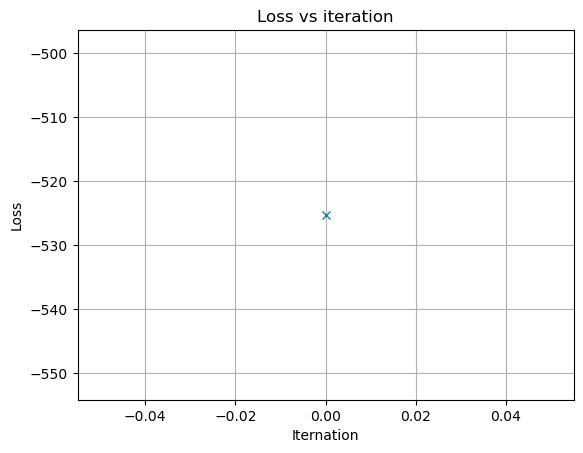

In [31]:
import torch
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

# a quadrilateral has four corners (x1, y1), (x2, y2), (x3, y3), (x4, y4)
# We want optimize the area of the quadrilateral while constraining the perimeter to 100 units

x1 = Variable(torch.randn(1), requires_grad=True)
y1 = Variable(torch.randn(1), requires_grad=True)
x2 = Variable(torch.randn(1), requires_grad=True)
y2 = Variable(torch.randn(1), requires_grad=True)
x3 = Variable(torch.randn(1), requires_grad=True)
y3 = Variable(torch.randn(1), requires_grad=True)
x4 = Variable(torch.randn(1), requires_grad=True)
y4 = Variable(torch.randn(1), requires_grad=True)

# Define the function for the area 
def compute_area(x1, y1, x2, y2, x3, y3, x4, y4):
    # Area = 0.5 * (d1 *d2)
    # where d1 = ((x1 - x3),(y1 - y3))
    # where d2 = ((x2 - x4),(y2 - y4))    
    return (0.5 * (torch.sqrt((x1 - x3)**2+(y1 - y3)**2))* 0.5 * (torch.sqrt((x2 - x4)**2+(y2 - y4)**2)))

# Define the function for the perimeter 
def compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4):
    # Perimeter = sum of the lengths of its sides
    s1 = torch.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    s2 = torch.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    s3 = torch.sqrt((x4 - x3)**2 + (y4 - y3)**2)
    s4 = torch.sqrt((x1 - x4)**2 + (y1 - y4)**2)
    return s1 + s2 + s3 + s4

# Define the optimizer (we are using stochastic gradient descent)
optimizer = optim.SGD([x1, y1, x2, y2, x3, y3, x4, y4], lr=.01)

# Number of steps in the optomisation
steps = 1000

# perimeter constraint...limmited to 100 units
max_perimeter = 100

loss_history = []

# Optimization loop
for step in range(steps):
    # Compute area
    area = compute_area(x1, y1, x2, y2, x3, y3, x4, y4)
    
    # Compute perimeter
    perimeter = compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4)
    
    # apply a penalty if peremter of 100 units is exceeded, not really confindent in this step and the next step
    perimeter_penalty = torch.max(torch.tensor(0.), perimeter**2 - max_perimeter**2) #hmmmm
    
    # loss function
    loss = (-area + perimeter_penalty**1)  # hmmmm
    
    # Zero gradients
    optimizer.zero_grad()
    
    # Compute gradients
    loss.backward()
    
    # Update parameters
    optimizer.step()

    if step % 100 == 0:
        print(f'Step {step}: loss = {loss.item()}')

# optomised coords
optimized_x1 = x1.item()
optimized_y1 = y1.item()
optimized_x2 = x2.item()
optimized_y2 = y2.item()
optimized_x3 = x3.item()
optimized_y3 = y3.item()
optimized_x4 = x4.item()
optimized_y4 = y4.item()

loss_history.append(loss.item())

plt.plot(loss_history, 'x')
plt.title("Loss vs iteration")
plt.ylabel('Loss')
plt.xlabel('Iternation')
plt.grid(True)

# Print the optimized coords, area and perimeter (should be a square)
print("Optimized Coordinates:")
print("Vertex 1: ({}, {})".format(optimized_x1, optimized_y1))
print("Vertex 2: ({}, {})".format(optimized_x2, optimized_y2))
print("Vertex 3: ({}, {})".format(optimized_x3, optimized_y3))
print("Vertex 4: ({}, {})".format(optimized_x4, optimized_y4))
print("Optimized Perimeter: {:.4f}".format(compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4).item()))
print("Optimized Area: {:.4f}".format(compute_area(x1, y1, x2, y2, x3, y3, x4, y4).item()))
print("")
